## Import necessary libraries

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Extract csv file

In [4]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## Extract Numerical Data Type


In [5]:
NumData = pd.DataFrame(data[['floor_area_sqm', 'lease_commence_date']])
NumData.head()

,floor_area_sqm,lease_commence_date
0,69.0,1986
1,61.0,1986
2,73.0,1976
3,73.0,1976
4,67.0,1976


In [6]:
NumData.describe()

,floor_area_sqm,lease_commence_date
count,369651.000000,369651.000000
mean,96.586204,1987.984659
std,25.598886,9.122421
min,28.000000,1966.000000
25%,73.000000,1981.000000
50%,100.000000,1987.000000
75%,115.000000,1997.000000
max,297.000000,2012.000000


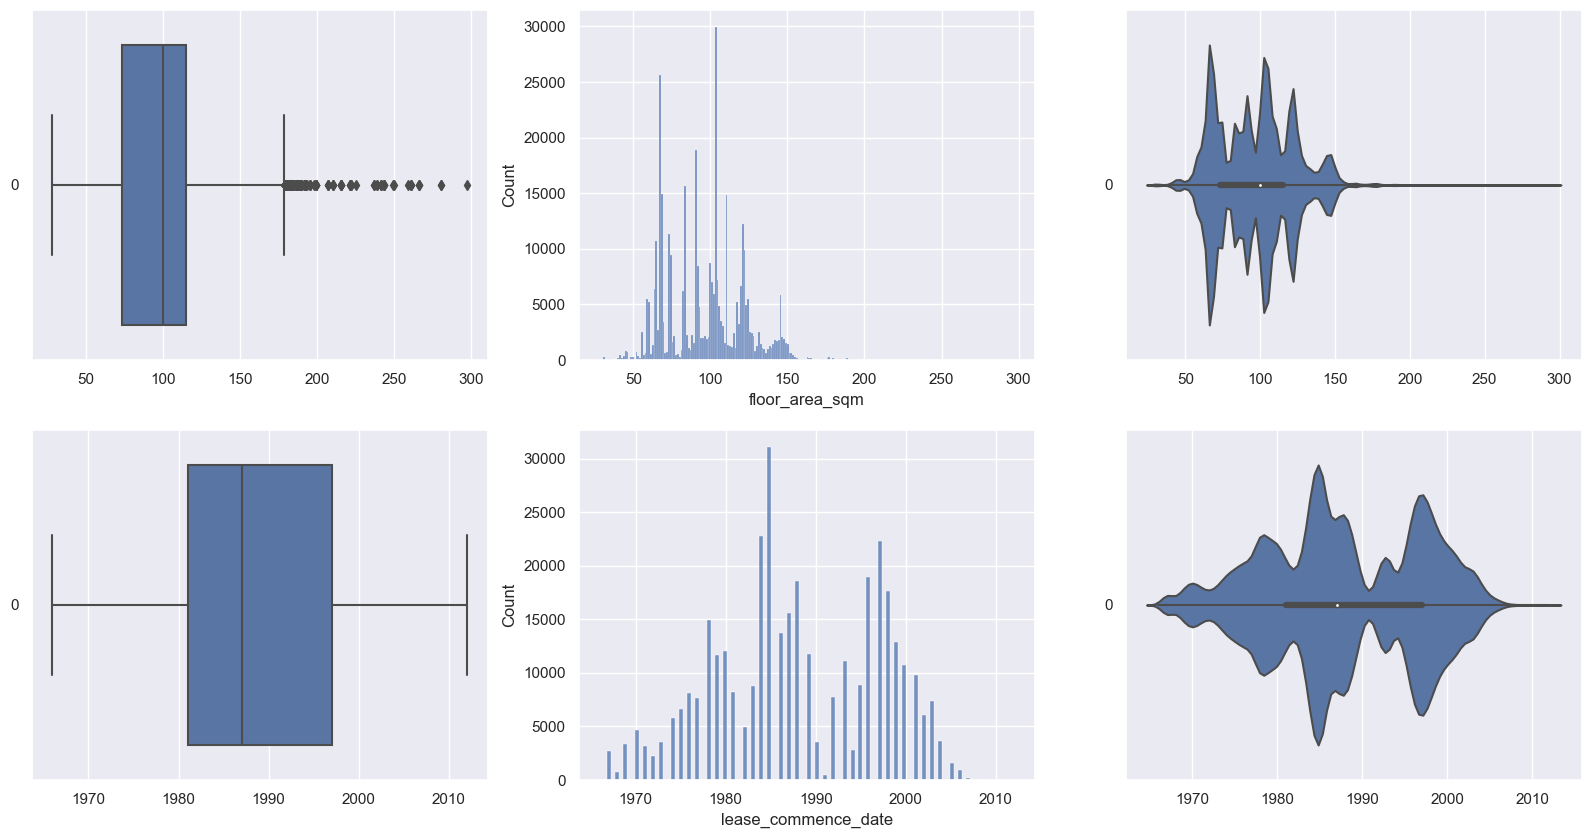

In [7]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(20, 10))

count = 0
for var in NumData:
    sb.boxplot(data = NumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumData[var], ax = axes[count,1])
    sb.violinplot(data = NumData[var], orient = "h", ax = axes[count,2])
    count += 1

## Correlation of predictors and resale_price

                     floor_area_sqm  lease_commence_date  resale_price
floor_area_sqm             1.000000             0.556850      0.690142
lease_commence_date        0.556850             1.000000      0.437268
resale_price               0.690142             0.437268      1.000000


<Axes: >

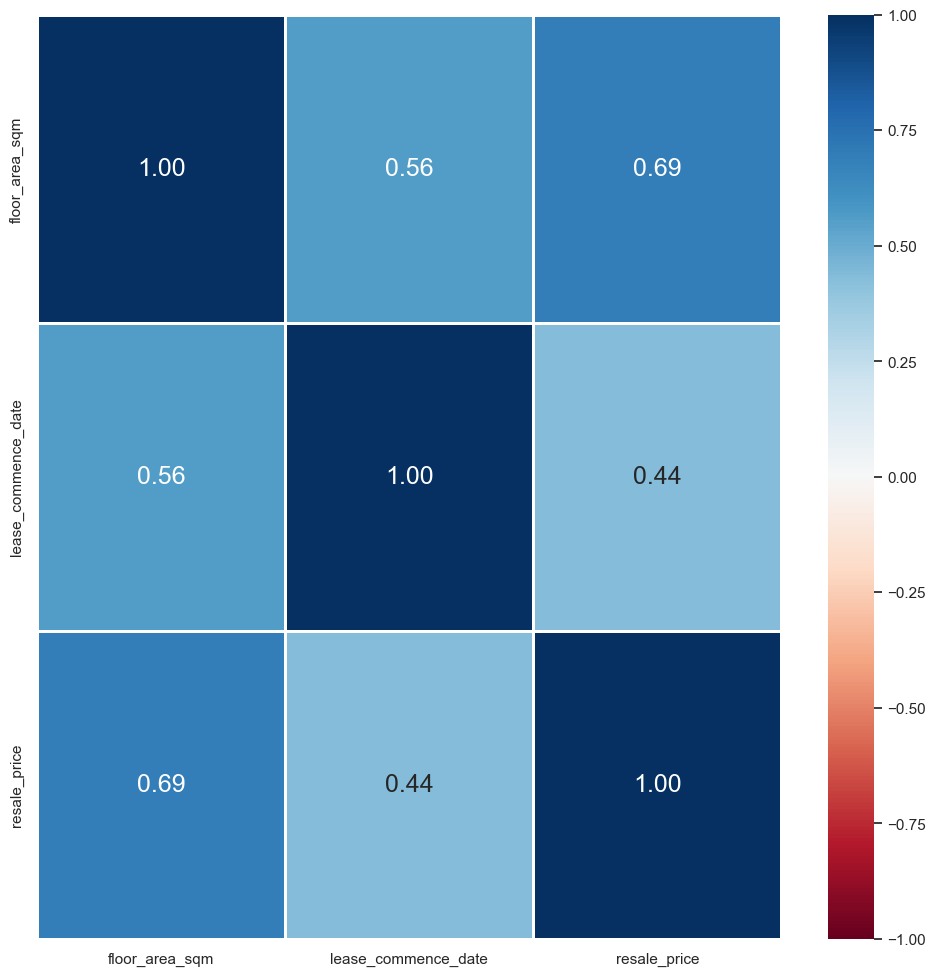

In [8]:
# Add ResalePrice to the dataframe
NumData = pd.concat([NumData, data["resale_price"]], axis = 1).reindex(NumData.index)

# Correlation Matrix
print(NumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Pairplot for the data

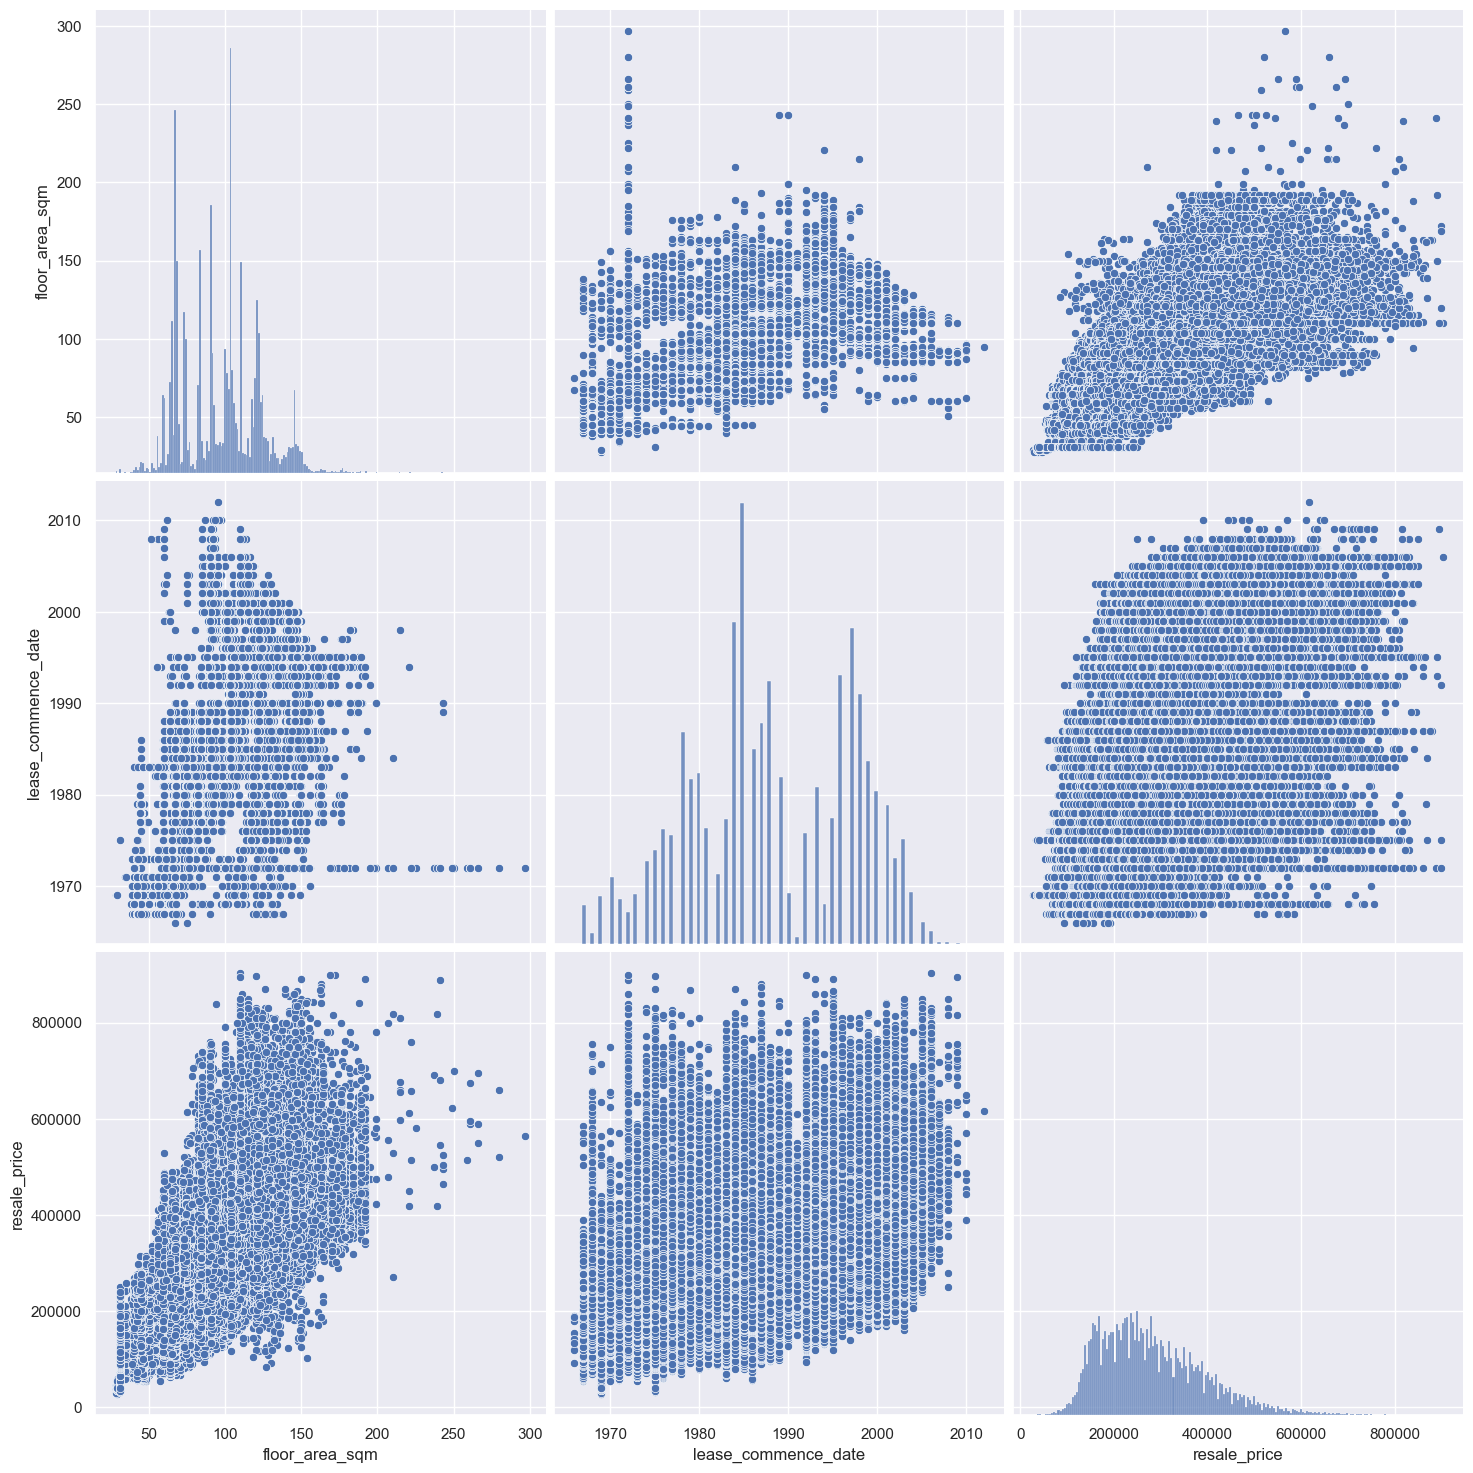

In [12]:
# Draw pairs of variables against one another
sb.pairplot(data = NumData, height = 5)

**Best predictor for `resale_price`**     

> `floor_area_sqm` : Possibly the most important variable : Highest Correlation, Strong Linearity      
> `lease_commence_date` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

From the above information, `floor_area_sqm` as the only top *individual* predictors, while `lease_commence_date` do not seem to play any important role in predicting resale_Price. However, we will still perform Multivariate Regression later on (`floor_area_sqm`, `lease_commence_date`) to analyse if they are a better pair to predict `resale_price` when we attempt a multivariate model
